In [10]:
import cv2
import numpy as np
import requests
from ultralytics import YOLO
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt


In [11]:
def load_image(image_source):
    if image_source.startswith("http://") or image_source.startswith("https://"):
        response = requests.get(image_source)
        if response.status_code == 200:
            image = Image.open(BytesIO(response.content)).convert("RGB")
            return np.array(image)
        else:
            raise Exception("Failed to download image")
    else:
        image = Image.open(image_source).convert("RGB")
        return np.array(image)

In [12]:
def detect_and_crop(image_source, output_width, output_height):
    model = YOLO("yolov8n.pt")  # Load YOLOv8 nano model
    image = load_image(image_source)
    img_h, img_w, _ = image.shape
    
    # Only crop if the image is larger than the desired crop size
    if img_w <= output_width or img_h <= output_height:
        return image, image  # Return original image if cropping isn't needed
    
    results = model(image)
    
    if not results:
        raise Exception("No objects detected in the image.")
    
    boxes = results[0].boxes.xyxy.cpu().numpy()  # Extract bounding box coordinates
    
    if len(boxes) == 0:
        raise Exception("No objects detected.")
    
    # Select the largest detected object (assuming main subject is largest)
    x_min, y_min, x_max, y_max = boxes[0]
    
    # Calculate object center
    obj_center_x = (x_min + x_max) / 2
    obj_center_y = (y_min + y_max) / 2
    
    # Maintain aspect ratio while cropping
    aspect_ratio = output_width / output_height
    crop_width = min(output_width, img_w)
    crop_height = int(crop_width / aspect_ratio)
    
    if crop_height > img_h:
        crop_height = img_h
        crop_width = int(crop_height * aspect_ratio)
    
    crop_x_min = max(0, int(obj_center_x - crop_width / 2))
    crop_x_max = min(img_w, crop_x_min + crop_width)
    crop_y_min = max(0, int(obj_center_y - crop_height / 2))
    crop_y_max = min(img_h, crop_y_min + crop_height)
    
    cropped_image = image[crop_y_min:crop_y_max, crop_x_min:crop_x_max]
    
    return image, cropped_image

In [13]:
def display_comparison(image_source, output_width, output_height):
    """
    Display original and cropped images side by side
    
    Args:
        original (numpy.ndarray): Original image array
        cropped (numpy.ndarray): Cropped image array
        figsize (tuple): Figure size for the plot (width, height)
    """
    original, cropped = detect_and_crop(image_source, output_width, output_height)
    if original is not None and cropped is not None:
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        
        # Display original image
        axes[0].imshow(original)
        axes[0].set_title("Original Image")
        axes[0].axis("off")
        
        # Display cropped image
        axes[1].imshow(cropped)
        axes[1].set_title("Cropped Image")
        axes[1].axis("off")
        
        plt.show()
    else:
        print("Cannot display images: Input images are None")


In [ ]:
# # Example usage
# #image_url = "https://img.freepik.com/free-photo/medium-shot-contemplative-man-seaside_23-2150531618.jpg"
# image_url = "https://img.freepik.com/free-photo/front-view-sad-girl-being-bullied-by-girls_23-2149748405.jpg"
# original, cropped = detect_and_crop(image_url, 250, 400)

# # Show both images for comparison
# cv2.imshow("Original Image", cv2.cvtColor(original, cv2.COLOR_RGB2BGR))
# cv2.imshow("Cropped Image", cv2.cvtColor(cropped, cv2.COLOR_RGB2BGR))
# cv2.waitKey(0)
# cv2.destroyAllWindows()


0: 448x640 3 persons, 76.3ms
Speed: 2.5ms preprocess, 76.3ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)


2025-02-06 11:16:08.125 python[69031:1738038] +[IMKClient subclass]: chose IMKClient_Modern
2025-02-06 11:16:08.125 python[69031:1738038] +[IMKInputSession subclass]: chose IMKInputSession_Modern



0: 448x640 1 person, 77.2ms
Speed: 4.1ms preprocess, 77.2ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


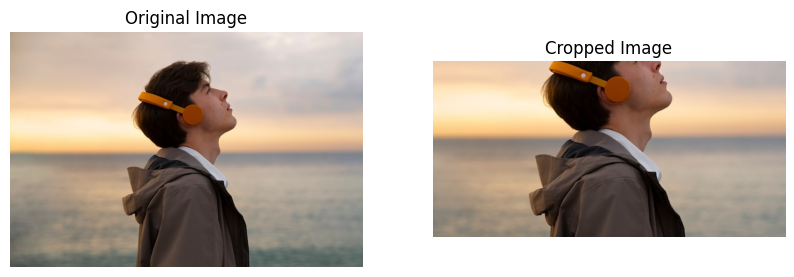

In [15]:
# Example usage
image_source = "https://img.freepik.com/free-photo/medium-shot-contemplative-man-seaside_23-2150531618.jpg"
display_comparison(image_source,500,250)



0: 448x640 1 person, 149.5ms
Speed: 3.1ms preprocess, 149.5ms inference, 1.7ms postprocess per image at shape (1, 3, 448, 640)


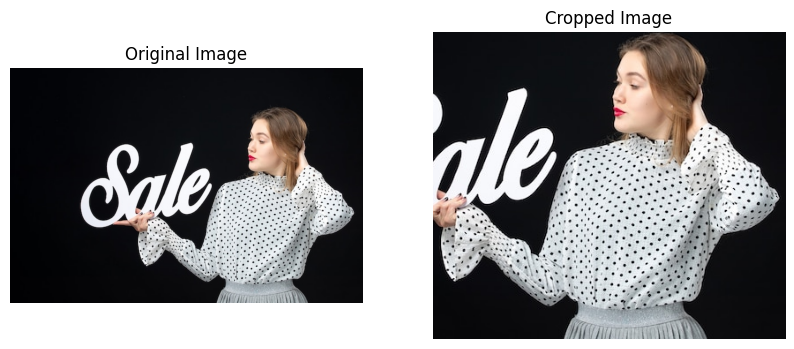

In [16]:
image_source = "https://img.freepik.com/free-photo/front-view-young-pretty-female-holding-sale-writing-black-wall-model-shopping-beauty-fashion-emotion-color_140725-108837.jpg"
display_comparison(image_source,400,350)


0: 448x640 1 person, 83.9ms
Speed: 4.7ms preprocess, 83.9ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


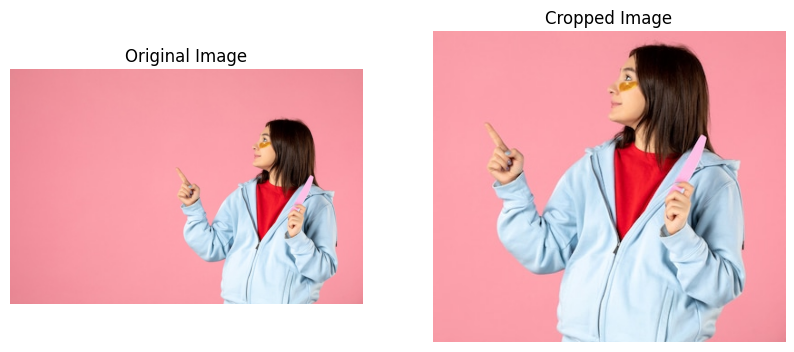

In [18]:
image_source = "https://img.freepik.com/free-photo/front-view-young-woman-with-eye-patches-nail-file-pink-wall_140725-147897.jpg"
display_comparison(image_source,400,350)


0: 448x640 3 persons, 90.8ms
Speed: 2.2ms preprocess, 90.8ms inference, 1.3ms postprocess per image at shape (1, 3, 448, 640)


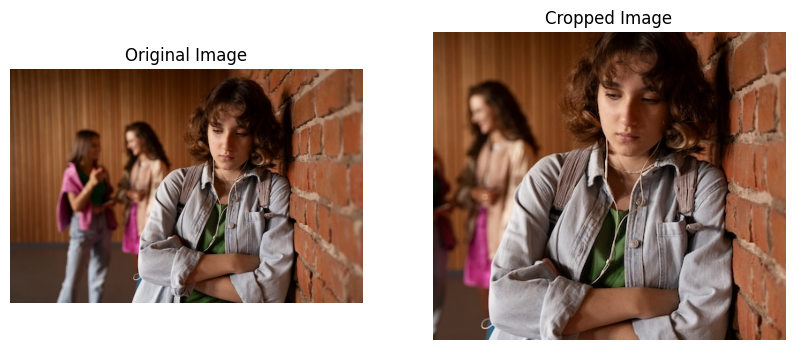

In [8]:
image_source = "https://img.freepik.com/free-photo/front-view-sad-girl-being-bullied-by-girls_23-2149748405.jpg"
display_comparison(image_source,400,350)


0: 448x640 1 person, 61.0ms
Speed: 1.6ms preprocess, 61.0ms inference, 0.7ms postprocess per image at shape (1, 3, 448, 640)


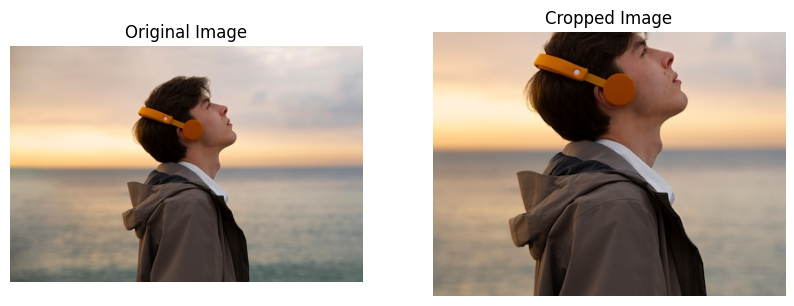

In [9]:
image_source = "https://img.freepik.com/free-photo/medium-shot-contemplative-man-seaside_23-2150531618.jpg"
display_comparison(image_source,400,300)